D:\ML_College\NLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
09:21:54 - cmdstanpy - INFO - Chain [1] start processing
09:21:54 - cmdstanpy - INFO - Chain [1] done processing


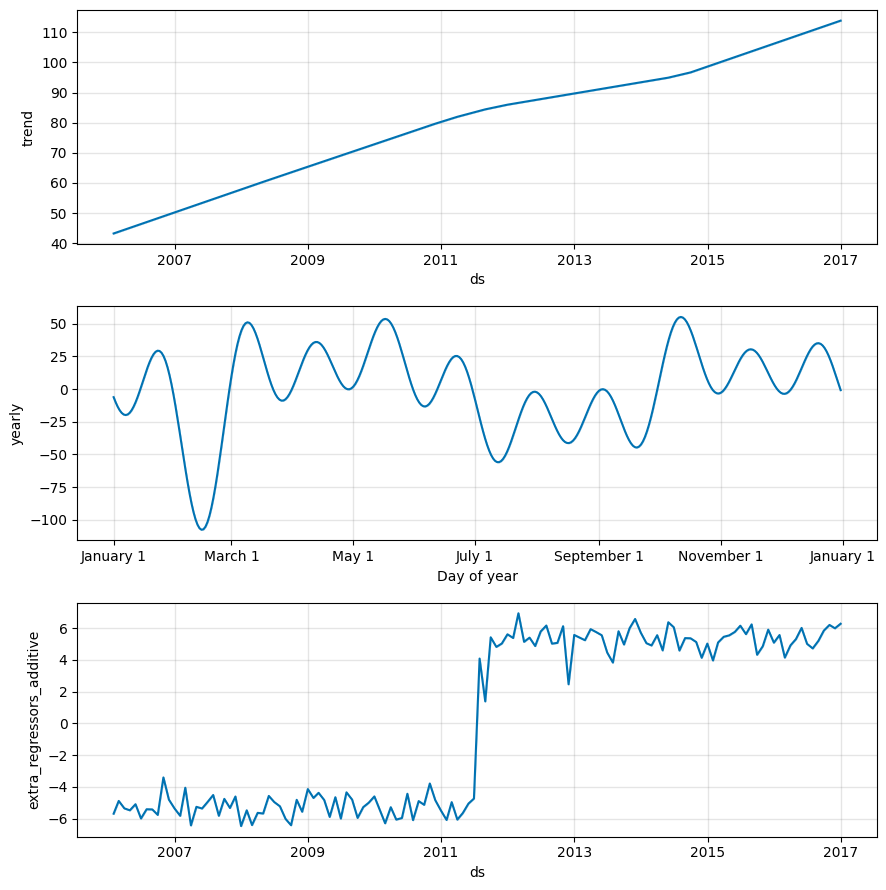

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.vector_ar.var_model import forecast

df = pd.read_csv("./data/p2.csv", parse_dates=['Date'])
df = df[['Date', 'Close', 'Volume']]
df.columns = ['ds', 'y', 'volume']

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)

model.add_regressor('volume')
model.fit(df)

future = model.make_future_dataframe(periods=0)

future['volume'] = df['volume'].values

forecast = model.predict(future)
model.plot_components(forecast)
plt.show()
